In [1]:
pip install librosa

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/260.1 kB ? eta -:--:--
   - -------------------------------------- 10.2/260.1 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/260.1 kB 435.7 kB/s eta 0:00:01
   ---- ---------------------------------- 30.7/260.1 kB 435.7 kB/s eta 0:00:01
   ------ -------------------------------- 41.0/260.1 kB 217.9 kB/s eta 0:00:02
   ---------- ---------------------------- 71.7/260.1 kB 280.5 kB/s eta 0:00:01
   ------------- ------------------------- 92.2/260.1 kB 348.6 kB/s eta 0:00:01
   ---------------- --------------------- 112.6/260.1 kB 344.8 kB/s eta 0:00:01
   ----------------- -------------------- 122.9/260.1 kB 327.4 kB/s eta 0:00:01
   ------------------------- ------------ 174.1/260.1 kB 403.5 kB/s eta 0:00:01
   ---------------------------------- --- 235.5/260.1 kB 497.3 kB/s eta 0:00:01
   -------------------------------------  256.0/260.1 kB 49

DEPRECATION: Loading egg at c:\program files\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
#loading sound data 
sample="Wake_Word/5.wav"
data,sample_rate=librosa.load(sample)

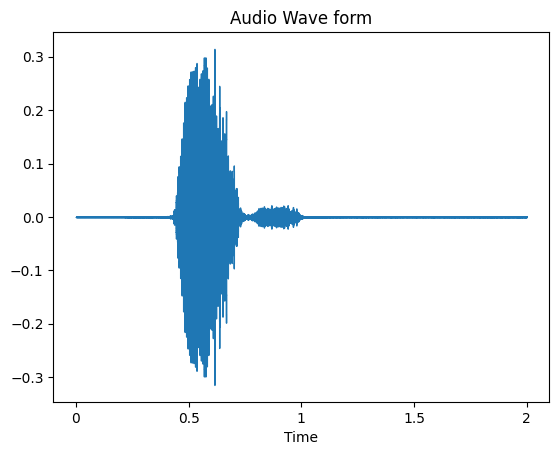

In [3]:
#visualize the the audio data wave form
plt.title("Audio Wave form")
librosa.display.waveshow(data,sr=sample_rate)
plt.show()

Shape of mfcc: (40, 87)


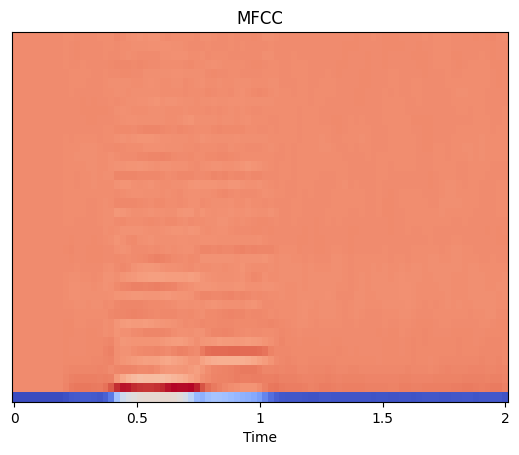

In [4]:
#visualize mfcc
mfccs=librosa.feature.mfcc(y=data,sr=sample_rate,n_mfcc=40)
print("Shape of mfcc:", mfccs.shape)

plt.title("MFCC")
librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time')
plt.show()


In [5]:
#Processing all audio files

all_audio_files_data=[]

all_data_dict={
    0:["Background/"+file_path for file_path in os.listdir("Background/")],
    1:["Wake_Word/"+file_path for file_path in os.listdir("Wake_Word/")]

}

In [6]:
for class_labels,files in all_data_dict.items():
    for file in files:
        data,sample_rate=librosa.load(file)
        mfccs=librosa.feature.mfcc(y=data,sr=sample_rate,n_mfcc=40)
        mfccs_processed=np.mean(mfccs.T,axis=0)
        all_audio_files_data.append([mfccs_processed,class_labels])
        print(f"Info: Succesfully Preprocessed Class Label {class_labels}")

Info: Succesfully Preprocessed Class Label 0
Info: Succesfully Preprocessed Class Label 0
Info: Succesfully Preprocessed Class Label 0
Info: Succesfully Preprocessed Class Label 0
Info: Succesfully Preprocessed Class Label 0
Info: Succesfully Preprocessed Class Label 0
Info: Succesfully Preprocessed Class Label 0
Info: Succesfully Preprocessed Class Label 0
Info: Succesfully Preprocessed Class Label 0
Info: Succesfully Preprocessed Class Label 0
Info: Succesfully Preprocessed Class Label 0
Info: Succesfully Preprocessed Class Label 0
Info: Succesfully Preprocessed Class Label 0
Info: Succesfully Preprocessed Class Label 0
Info: Succesfully Preprocessed Class Label 0
Info: Succesfully Preprocessed Class Label 0
Info: Succesfully Preprocessed Class Label 0
Info: Succesfully Preprocessed Class Label 0
Info: Succesfully Preprocessed Class Label 0
Info: Succesfully Preprocessed Class Label 0
Info: Succesfully Preprocessed Class Label 0
Info: Succesfully Preprocessed Class Label 0
Info: Succ

In [7]:
df=pd.DataFrame(all_audio_files_data,columns=["feature","class_label"])

In [8]:
df.to_pickle("D:/Wake word detection/Processed_data_file/audio_data.csv")

In [9]:
df.to_csv("D:/Wake word detection/Processed_data_file/audio_data1.csv")